# AutoEncoder

## Import Module

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import torch.utils.data as Data
import torchvision.transforms as transforms
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

## Set Hyperparameters

In [2]:
epoch = 5
batch_size = 64
lr = 0.005         # learning rate
DOWNLOAD_FashionMNIST = False #data download
N_TEST_IMG = 5  #

## Data Acquisition

torch.Size([60000, 28, 28])
torch.Size([60000])


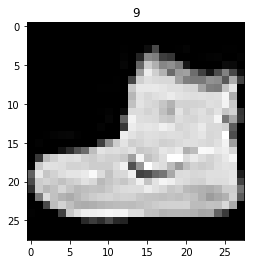

In [3]:
train_data = torchvision.datasets.FashionMNIST(root='C:/Users/Cesare/DeeplearningwirtPytorch/data/FashionMNIST',train=True, 
                                               transform=transforms.ToTensor(),download=False)
#plot the example
print(train_data.data.size())
print(train_data.targets.size())
plt.imshow(train_data.data[0].numpy(),cmap='gray')
plt.title('%i'%train_data.targets[0])
plt.show()

train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


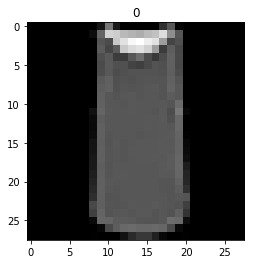

In [4]:
# plot one example
print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[2])
plt.show()

## Build Model

In [7]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

## Instance

In [8]:
autoencoder = AutoEncoder()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=lr)
loss_func = nn.MSELoss()

## Initialize Figure

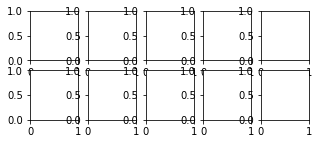

In [9]:
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

## Original Data For Viewing

In [14]:
view_data = train_data.data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(()) 
    a[0][i].set_yticks(())

## Training

In [11]:
for epoch in range(epoch):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(())
                a[1][i].set_yticks(())
            plt.draw()
            plt.pause(0.05)

plt.ioff()
plt.show()

Epoch:  0 | train loss: 0.1686


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0463


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0389


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0299


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0304


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0333


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0297


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0289


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0274


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0264


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0282


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0277


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0262


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0255


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0261


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0278


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0255


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0242


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0232


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0236


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0228


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0236


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0271


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0275


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0221


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0255


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0251


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0223


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0230


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0262


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0266


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0244


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0226


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0245


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0259


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0221


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0265


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0253


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0244


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0249


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0237


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0239


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0239


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0236


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0215


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0256


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0267


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0256


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0262


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0235


<Figure size 432x288 with 0 Axes>

## Visualize 3D plot

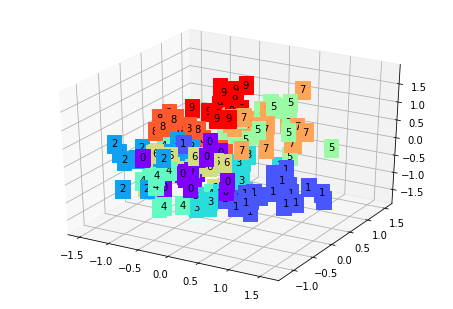

In [12]:
view_data = train_data.data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.targets[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()